**Multiple linear regression: dataset, training and test split up, model, r2 error,  mse, regularization, prediction, visualization, Stat model report**

In [45]:
import pandas as pd
import matplotlib.pyplot as plt

**Step 1 : Importing Dataset**

In [2]:
df = pd.read_csv("melbourne_house_price.csv")
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


**Step 2 : Data Cleaning**

In [3]:
df.nunique()

Suburb             351
Address          34009
Rooms               12
Type                 3
Price             2871
Method               9
SellerG            388
Date                78
Distance           215
Postcode           211
Bedroom2            15
Bathroom            11
Car                 15
Landsize          1684
BuildingArea       740
YearBuilt          160
CouncilArea         33
Lattitude        13402
Longtitude       14524
Regionname           8
Propertycount      342
dtype: int64

In [4]:
df.shape

(34857, 21)

**2.a : Removing the necessary coloumns and keeping the coloumns that are needed**

In [5]:
cols_to_use = ['Suburb', 'Rooms', 'Type', 'Method', 'Regionname', 'Propertycount', 'Distance',
               'CouncilArea', 'Bedroom2','Car','BuildingArea','Price','Landsize','SellerG','Bathroom']
df = df[cols_to_use]
df.head()

,Suburb,Rooms,Type,Method,Regionname,Propertycount,Distance,CouncilArea,Bedroom2,Car,BuildingArea,Price,Landsize,SellerG,Bathroom
0,Abbotsford,2,h,SS,Northern Metropolitan,4019.0,2.5,Yarra City Council,2.0,1.0,NaN,NaN,126.0,Jellis,1.0
1,Abbotsford,2,h,S,Northern Metropolitan,4019.0,2.5,Yarra City Council,2.0,1.0,NaN,1480000.0,202.0,Biggin,1.0
2,Abbotsford,2,h,S,Northern Metropolitan,4019.0,2.5,Yarra City Council,2.0,0.0,79.0,1035000.0,156.0,Biggin,1.0
3,Abbotsford,3,u,VB,Northern Metropolitan,4019.0,2.5,Yarra City Council,3.0,1.0,NaN,NaN,0.0,Rounds,2.0
4,Abbotsford,3,h,SP,Northern Metropolitan,4019.0,2.5,Yarra City Council,3.0,0.0,150.0,1465000.0,134.0,Biggin,2.0


In [6]:
df.shape

(34857, 15)

**2.b : Handling with missing and null values**

In [7]:
df.isna().sum()

Suburb               0
Rooms                0
Type                 0
Method               0
Regionname           3
Propertycount        3
Distance             1
CouncilArea          3
Bedroom2          8217
Car               8728
BuildingArea     21115
Price             7610
Landsize         11810
SellerG              0
Bathroom          8226
dtype: int64

In [8]:
cols_to_fill_zero = ['Bedroom2', 'Car','Propertycount','Distance','Bathroom']
df[cols_to_fill_zero] = df[cols_to_fill_zero].fillna(0)

In [9]:
df.isna().sum()

Suburb               0
Rooms                0
Type                 0
Method               0
Regionname           3
Propertycount        0
Distance             0
CouncilArea          3
Bedroom2             0
Car                  0
BuildingArea     21115
Price             7610
Landsize         11810
SellerG              0
Bathroom             0
dtype: int64

In [10]:
df['BuildingArea'] = df['BuildingArea'].fillna(df.BuildingArea.mean())
df['Landsize'] = df['Landsize'].fillna(df.Landsize.mean())
df.isna().sum()

Suburb              0
Rooms               0
Type                0
Method              0
Regionname          3
Propertycount       0
Distance            0
CouncilArea         3
Bedroom2            0
Car                 0
BuildingArea        0
Price            7610
Landsize            0
SellerG             0
Bathroom            0
dtype: int64

In [11]:
df.dropna(inplace=True)
df.isna().sum()

Suburb           0
Rooms            0
Type             0
Method           0
Regionname       0
Propertycount    0
Distance         0
CouncilArea      0
Bedroom2         0
Car              0
BuildingArea     0
Price            0
Landsize         0
SellerG          0
Bathroom         0
dtype: int64

**Now our dataset doesnot contain any type of null values**

**2.c : Handling with categorical values**

In [12]:
df.head()

,Suburb,Rooms,Type,Method,Regionname,Propertycount,Distance,CouncilArea,Bedroom2,Car,BuildingArea,Price,Landsize,SellerG,Bathroom
1,Abbotsford,2,h,S,Northern Metropolitan,4019.0,2.5,Yarra City Council,2.0,1.0,160.2564,1480000.0,202.0,Biggin,1.0
2,Abbotsford,2,h,S,Northern Metropolitan,4019.0,2.5,Yarra City Council,2.0,0.0,79.0000,1035000.0,156.0,Biggin,1.0
4,Abbotsford,3,h,SP,Northern Metropolitan,4019.0,2.5,Yarra City Council,3.0,0.0,150.0000,1465000.0,134.0,Biggin,2.0
5,Abbotsford,3,h,PI,Northern Metropolitan,4019.0,2.5,Yarra City Council,3.0,1.0,160.2564,850000.0,94.0,Biggin,2.0
6,Abbotsford,4,h,VB,Northern Metropolitan,4019.0,2.5,Yarra City Council,3.0,2.0,142.0000,1600000.0,120.0,Nelson,1.0


In [13]:
df = pd.get_dummies(df, drop_first=True)
df.head()

,Rooms,Propertycount,Distance,Bedroom2,Car,BuildingArea,Price,Landsize,Bathroom,Suburb_Aberfeldie,...,SellerG_hockingstuart/Harcourts,SellerG_hockingstuart/Marshall,SellerG_hockingstuart/Sweeney,SellerG_hockingstuart/Village,SellerG_hockingstuart/hockingstuart,SellerG_iHomes,SellerG_iOne,SellerG_iProperty,SellerG_iSell,SellerG_iTRAK
1,2,4019.0,2.5,2.0,1.0,160.2564,1480000.0,202.0,1.0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,4019.0,2.5,2.0,0.0,79.0000,1035000.0,156.0,1.0,0,...,0,0,0,0,0,0,0,0,0,0
4,3,4019.0,2.5,3.0,0.0,150.0000,1465000.0,134.0,2.0,0,...,0,0,0,0,0,0,0,0,0,0
5,3,4019.0,2.5,3.0,1.0,160.2564,850000.0,94.0,2.0,0,...,0,0,0,0,0,0,0,0,0,0
6,4,4019.0,2.5,3.0,2.0,142.0000,1600000.0,120.0,1.0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
df.shape

(27244, 745)

**2.d : Removing outliers using Z Score**

In [15]:
df['zscore'] = (df.Price-df.Price.mean())/df.Price.std()
df.head()

,Rooms,Propertycount,Distance,Bedroom2,Car,BuildingArea,Price,Landsize,Bathroom,Suburb_Aberfeldie,...,SellerG_hockingstuart/Marshall,SellerG_hockingstuart/Sweeney,SellerG_hockingstuart/Village,SellerG_hockingstuart/hockingstuart,SellerG_iHomes,SellerG_iOne,SellerG_iProperty,SellerG_iSell,SellerG_iTRAK,zscore
1,2,4019.0,2.5,2.0,1.0,160.2564,1480000.0,202.0,1.0,0,...,0,0,0,0,0,0,0,0,0,0.669985
2,2,4019.0,2.5,2.0,0.0,79.0000,1035000.0,156.0,1.0,0,...,0,0,0,0,0,0,0,0,0,-0.023710
4,3,4019.0,2.5,3.0,0.0,150.0000,1465000.0,134.0,2.0,0,...,0,0,0,0,0,0,0,0,0,0.646602
5,3,4019.0,2.5,3.0,1.0,160.2564,850000.0,94.0,2.0,0,...,0,0,0,0,0,0,0,0,0,-0.312100
6,4,4019.0,2.5,3.0,2.0,142.0000,1600000.0,120.0,1.0,0,...,0,0,0,0,0,0,0,0,0,0.857048


In [16]:
outliers_z = df[(df.zscore < -3) | (df.zscore > 3)]
outliers_z.shape

(474, 746)

In [17]:
df2 = df[(df.zscore>-3)&(df.zscore<3)]
df2.shape

(26770, 746)

In [18]:
df2.describe()

,Rooms,Propertycount,Distance,Bedroom2,Car,BuildingArea,Price,Landsize,Bathroom,Suburb_Aberfeldie,...,SellerG_hockingstuart/Marshall,SellerG_hockingstuart/Sweeney,SellerG_hockingstuart/Village,SellerG_hockingstuart/hockingstuart,SellerG_iHomes,SellerG_iOne,SellerG_iProperty,SellerG_iSell,SellerG_iTRAK,zscore
count,26770.000000,26770.000000,26770.000000,26770.000000,26770.000000,26770.000000,2.677000e+04,26770.000000,26770.000000,26770.000000,...,26770.000000,26770.000000,26770.000000,26770.000000,26770.000000,26770.000000,26770.000000,26770.000000,26770.000000,26770.000000
mean,2.970116,7567.787860,11.349204,2.305417,1.272394,157.653006,1.000305e+06,590.769698,1.195405,0.002578,...,0.000037,0.000037,0.000037,0.000261,0.000037,0.000037,0.000037,0.000934,0.001158,-0.077795
std,0.937712,4512.377852,6.814526,1.526595,1.126131,282.895721,5.091676e+05,3078.816964,0.888637,0.050705,...,0.006112,0.006112,0.006112,0.016169,0.006112,0.006112,0.006112,0.030546,0.034011,0.793724
min,1.000000,83.000000,0.000000,0.000000,0.000000,0.000000,8.500000e+04,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.504632
25%,2.000000,4294.000000,6.400000,1.000000,0.000000,154.000000,6.310000e+05,346.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.653492
50%,3.000000,6567.000000,10.500000,3.000000,1.000000,160.256400,8.600000e+05,593.598993,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.296512
75%,4.000000,10412.000000,14.000000,3.000000,2.000000,160.256400,1.260000e+06,593.598993,2.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.327034
max,12.000000,21650.000000,48.100000,20.000000,18.000000,44515.000000,2.960000e+06,433014.000000,9.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.977105


**3. Train Test Splitup**

In [25]:
X = df2.drop('Price', axis=1)
X.head()

,Rooms,Propertycount,Distance,Bedroom2,Car,BuildingArea,Landsize,Bathroom,Suburb_Aberfeldie,Suburb_Airport West,...,SellerG_hockingstuart/Marshall,SellerG_hockingstuart/Sweeney,SellerG_hockingstuart/Village,SellerG_hockingstuart/hockingstuart,SellerG_iHomes,SellerG_iOne,SellerG_iProperty,SellerG_iSell,SellerG_iTRAK,zscore
1,2,4019.0,2.5,2.0,1.0,160.2564,202.0,1.0,0,0,...,0,0,0,0,0,0,0,0,0,0.669985
2,2,4019.0,2.5,2.0,0.0,79.0000,156.0,1.0,0,0,...,0,0,0,0,0,0,0,0,0,-0.023710
4,3,4019.0,2.5,3.0,0.0,150.0000,134.0,2.0,0,0,...,0,0,0,0,0,0,0,0,0,0.646602
5,3,4019.0,2.5,3.0,1.0,160.2564,94.0,2.0,0,0,...,0,0,0,0,0,0,0,0,0,-0.312100
6,4,4019.0,2.5,3.0,2.0,142.0000,120.0,1.0,0,0,...,0,0,0,0,0,0,0,0,0,0.857048


In [26]:
y = df2.Price
y.head()

1    1480000.0
2    1035000.0
4    1465000.0
5     850000.0
6    1600000.0
Name: Price, dtype: float64

In [27]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

**4. Model Bulding**

In [28]:
from sklearn.linear_model import LinearRegression
Linear_reg = LinearRegression()
Linear_reg.fit(x_train,y_train)

LinearRegression()

In [29]:
Bias = Linear_reg.score(x_train,y_train)
Bias

1.0

In [30]:
Variance = Linear_reg.score(x_test,y_test)
Variance

1.0

**5. Estimating the Errors and Predictions**

In [33]:
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn import metrics

predictions = Linear_reg.predict(x_test)  
mse = mean_squared_error(y_test, predictions) 
rmse = np.sqrt(mse)

print("RMSE on Predicted output value : ", rmse)
print("MAE on Predicted output value : ", metrics.mean_absolute_error(y_test,predictions))
print("MSE on Predicted output value : ", metrics.mean_squared_error(y_test,predictions))

RMSE on Predicted output value :  2.3519595489909916e-06
MAE on Predicted output value :  1.334494535056655e-06
MSE on Predicted output value :  5.531713720089908e-12


In [36]:
from sklearn.metrics import accuracy_score, r2_score
print("r2_Score : ", r2_score(y_test,predictions))

r2_Score :  1.0


**6. Regularizations**

In [37]:
from sklearn import linear_model

Ridge_reg = linear_model.Ridge(alpha=50, max_iter = 100, tol = 0.1)

Ridge_reg.fit(x_train, y_train)

Ridge(alpha=50, max_iter=100, tol=0.1)

In [41]:
Bias_Ridge = Ridge_reg.score(x_train,y_train)
Bias_Ridge

0.9999587146133231

In [42]:
Variance_Ridge = Ridge_reg.score(x_test,y_test)
Variance_Ridge

0.999958131843537

In [38]:
from sklearn import linear_model

Lasso_reg = linear_model.Lasso(alpha=50, max_iter = 100, tol = 0.1)

Lasso_reg.fit(x_train, y_train)

Lasso(alpha=50, max_iter=100, tol=0.1)

In [39]:
Bias_Lasso = Lasso_reg.score(x_train,y_train)
Bias_Lasso

0.996238611984773

In [40]:
Variance_Lasso = Lasso_reg.score(x_test,y_test)
Variance_Lasso

0.9962209716106191

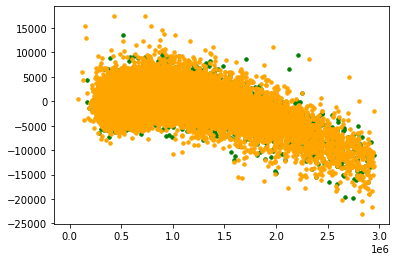

In [44]:
plt.scatter(Ridge_reg.predict(x_test),Ridge_reg.predict(x_test)-y_test, color="green", s=12, label="Test data")
 
plt.scatter(Ridge_reg.predict(x_train),Ridge_reg.predict(x_train)-y_train, color="orange", s=12, label="Train data")

plt.hlines(y=0, xmin=50,xmax=180,linewidth=2)


**7. Visualizations**

C:\Users\Sanjay\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


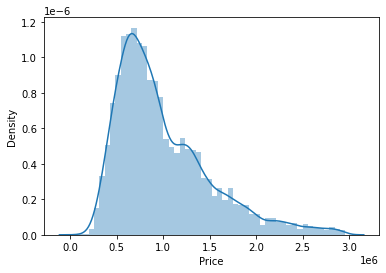

In [46]:
import seaborn as sns
sns.distplot(df2['Price']);

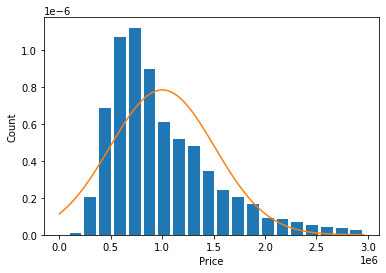

In [49]:
from scipy.stats import norm
import numpy as np

plt.hist(df2.Price, bins=20, rwidth=0.8, density=True)
plt.xlabel('Price')
plt.ylabel('Count')

rng = np.arange(0, df2.Price.max(), 100)
plt.plot(rng, norm.pdf(rng,df2.Price.mean(),df2.Price.std()))

**8. Stat Model Report**

In [50]:
# displaying the DataFrame
print('DataFrame:\n', df2)
# saving the DataFrame as a CSV file
New_data = df2.to_csv('New_data.csv', index = True)
print('\nCSV String:\n', New_data)

DataFrame:
        Rooms  Propertycount  Distance  Bedroom2  Car  BuildingArea      Price  \
1          2         4019.0       2.5       2.0  1.0      160.2564  1480000.0   
2          2         4019.0       2.5       2.0  0.0       79.0000  1035000.0   
4          3         4019.0       2.5       3.0  0.0      150.0000  1465000.0   
5          3         4019.0       2.5       3.0  1.0      160.2564   850000.0   
6          4         4019.0       2.5       3.0  2.0      142.0000  1600000.0   
...      ...            ...       ...       ...  ...           ...        ...   
34852      4         6543.0       6.3       4.0  3.0      160.2564  1480000.0   
34853      2         6543.0       6.3       2.0  1.0      104.0000   888000.0   
34854      2         6543.0       6.3       2.0  2.0      120.0000   705000.0   
34855      3         6543.0       6.3       0.0  0.0      160.2564  1140000.0   
34856      2         6543.0       6.3       2.0  0.0      103.0000  1020000.0   

         Landsi

In [52]:
import statsmodels.api as sm
  
# reading data from the csv
data = pd.read_csv('New_data.csv')

# adding the constant term
x = sm.add_constant(X)

# performing the regression and fitting the model
result = sm.OLS(y_test, x_test).fit()
  
# printing the summary table
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 4.739e+23
Date:                Wed, 23 Feb 2022   Prob (F-statistic):               0.00
Time:                        16:36:28   Log-Likelihood:                 62112.
No. Observations:                5354   AIC:                        -1.231e+05
Df Residuals:                    4815   BIC:                        -1.196e+05
Df Model:                         538                                         
Covariance Type:            nonrobust                                         
                                                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------